Suppose $X\sim Bin(m,p)$ for some fixed $m$ and $p$ has the prior density $c\sin^{2}(\pi p)$,
where $c$ is a normalizing constant. throughout the example, $c$ denotes a generic constant,
and is not intended to mean the same constant at every use.

The posterior density of $p$ given $X = x$ is
$$
    \pi(p|X=x) = cp^{x}(1-p)^{m-x}\sin ^{2}(\pi p), \ \ 0<p<1.  
$$
The problem is to find the posterior mean
$$
    \mu = c \int_{0}^{1} p\left[cp^{x}(1-p)^{m-x}\sin ^{2}(\pi p)\right]dp.
$$

We use importance sampling to approximate the value of $\mu$. Towards this, choose
$$
    \phi(p)=p, \ h_0(p) = p^{x} (1-p)^{m-x} \sin ^{2}(\pi p),\ h_1(p) = p^{x}(1-p)^{m-x},   
$$

Then
$$
        \hat{\mu} = \frac{\sum_{i=1}^{n}\frac{\phi(p_i)h_0(p_i)}{h_1(p_i)} }{\sum_{i=1}^{n}\frac{h_0(p_i)}{h_1(p_i)} }
                  = \frac{\sum_{i=1}^{n}p_i\sin ^{2}(\pi p_i) }{\sum_{i=1}^{n} \sin ^{2}(\pi p_i) }
$$

$p_1,p_2,\ldots,p_n$ are samples from $F_1$, (i.e. $p_i\sim Beta(x+1, m-x+1)$),

We take $m=100$, $x=45$ for specificity.

In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
# define values
m = 100
x = 45

In [3]:
def estimation_of_mu(n, x=x, m=m):
    p = np.random.beta(x + 1, m - x + 1, n)
    sin2 = np.power(np.sin(np.pi * p), 2)
    p_sin2 = np.multiply(p, sin2)
    numerator = np.sum(p_sin2)
    denominator = np.sum(sin2)
    mu_hat = np.divide(numerator, denominator)
    var = np.divide(np.var(p_sin2), np.var(sin2))
    return mu_hat, var

In [4]:
sample_sizes = np.array([20, 50, 100, 250, 500])
sample_mean = np.array([])
sample_var = np.array([])
for n in sample_sizes:
    mu, var = estimation_of_mu(n)
    sample_mean = np.append(sample_mean, mu)
    sample_var = np.append(sample_var, var)

In [5]:
print("Sample Size  Importance Sampling Estimate of mu  Variance")
i = 0
for n in sample_sizes:
    print(f"{sample_sizes[i]}  {sample_mean[i]:.4f}  {sample_var[i]:.4f}")
    i += 1

Sample Size  Importance Sampling Estimate of mu  Variance
20  0.4608  2.3910
50  0.4473  1.4580
100  0.4564  1.6181
250  0.4482  1.4176
500  0.4517  1.4346


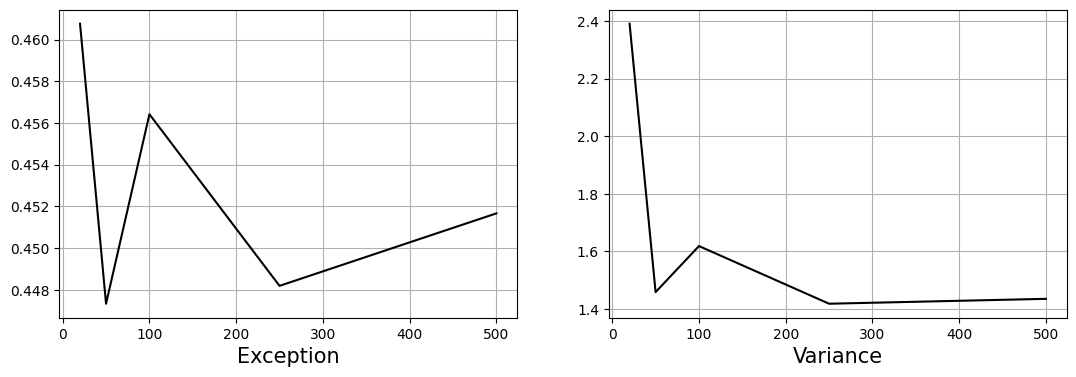

In [9]:
plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
sns.lineplot(x=sample_sizes, y=sample_mean, c="black")
plt.grid()
plt.xlabel("Exception", fontsize=15)
plt.subplot(1, 2, 2)
sns.lineplot(x=sample_sizes, y=sample_var, c="black")
plt.xlabel("Variance", fontsize=15)
plt.grid()
plt.show()

In [21]:
# ploting curves
def pih_h_0(p, x=x, m=m):
    return p * np.power(p, x) * np.power(1 - p, m - x) * np.power(np.sin(np.pi * p), 2)


def h_1(p, x=x, m=m):
    return np.power(p, x) * np.power(1 - p, m - x)

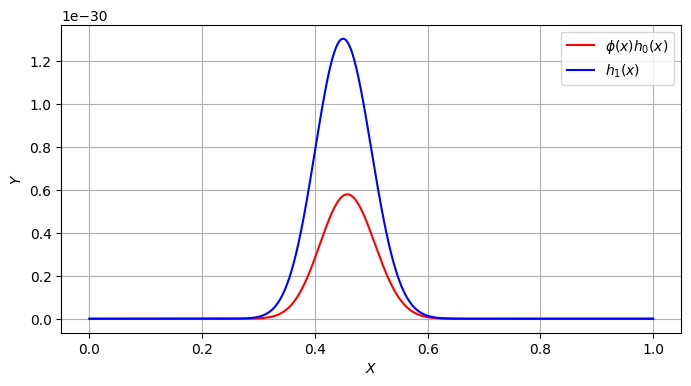

In [27]:
from cProfile import label


x = np.linspace(0, 1, 10000)

plt.figure(figsize=(8, 4))
plt.plot(x, pih_h_0(x), c="r", label=r"$\phi(x)h_0(x)$")
plt.plot(x, h_1(x), c="b", label=r"$h_1(x)$")
plt.xlabel(r"$X$")
plt.ylabel(r"$Y$")
plt.grid()
plt.legend()
plt.show()